# Higgs Boson Detection 2024
*Searching for exotic particles in high-energy physics with machine learning*

## Overview
The goal of this competition is to classify events into two classes: events that produce the exotic Higgs Boson particle, and those that do not. Each event is a simulated particle collision represented by 28 features that describe the trajectories of decay particles. These are realistic simulations of particle collisions occuring in the ATLAS detector at the Large Hadron Collider at CERN, near Geneva, Switzerland.

An analysis like this was used to discover the Higgs Boson in 2012; a machine learning classifier was trained on simulation and calibration data, then used to analyze real data from the experiment. Improved machine learning methods for this type of data could enable physicists to make new discoveries faster. It is thought that there are additional particles yet to be discovered, so more sensitive machine learning methods could help scientists discover new physics.

## Dataset

This data set is a sample from the HIGGS data set published with [Baldi, Sadowski, and Whiteson, Searching for Exotic Particles in High-Energy Physics with Deep Learning](https://www.nature.com/articles/ncomms5308) and available [here](https://archive.ics.uci.edu/ml/datasets/HIGGS).

In [2]:
%%bash
mkdir -p data

In [5]:
!wget "https://archive.ics.uci.edu/static/public/280/higgs.zip" -P data -q --show-progress

higgs.zip               [               <=>  ]   2.62G  58.6MB/s    in 46s     


In [13]:
!unzip data/higgs.zip

unzip:  cannot find or open higgs.zip, higgs.zip.zip or higgs.zip.ZIP.


In [18]:
!gzip -d HIGGS.csv.gz

In [19]:
!ls

data  HIGGS.csv  sample_data


In [21]:
#Load the dataset using pandas and numpy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [29]:
column_names = ['lable', 'lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
                'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
                'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
                'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
                'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag', \
                'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

In [36]:
df = pd.read_csv('HIGGS.csv', header=None, nrows=200000)
df.columns=column_names

In [40]:
df.head()

,lable,lep_pt,lep_eta,lep_phi,MET,MET_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,...,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [38]:
features_low = ['lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
                'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
                'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
                'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
                'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag']

features_high = ['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

features = ['lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
            'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
            'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
            'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
            'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag', \
            'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

In [39]:
y = df['lable'].values
X = df[[col for col in features]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

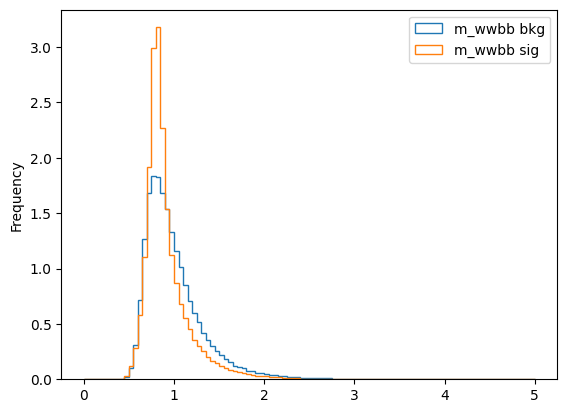

In [65]:
import matplotlib.pyplot as plt

#plot a few features
var_name = 'm_wwbb'
ax = df[df['lable']==0].plot.hist(column=[var_name], bins=100, range=(0, 5), histtype='step', density=True)
#ax.set_yscale('log')
df[df['lable']==1].plot.hist(column=[var_name], bins=100, range=(0, 5), histtype='step', density = True, ax=ax)
ax.legend(labels=[var_name+' bkg', var_name+' sig'])

In [ ]:
# Enjoy!